# Loading Libraries

In [1]:
# utilities
import pandas as pd
import numpy as np
import regex as re
import pickle
#NLTK Library
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import spacy
# Sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
# Plotting
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Reading the Data

In [2]:
df = pd.read_csv('IMDB Dataset.csv')
df.describe

<bound method NDFrame.describe of                                                   review sentiment
0      One of the other reviewers has mentioned that ...  positive
1      A wonderful little production. <br /><br />The...  positive
2      I thought this was a wonderful way to spend ti...  positive
3      Basically there's a family where a little boy ...  negative
4      Petter Mattei's "Love in the Time of Money" is...  positive
...                                                  ...       ...
49995  I thought this movie did a down right good job...  positive
49996  Bad plot, bad dialogue, bad acting, idiotic di...  negative
49997  I am a Catholic taught in parochial elementary...  negative
49998  I'm going to have to disagree with the previou...  negative
49999  No one expects the Star Trek movies to be high...  negative

[50000 rows x 2 columns]>

### Summary of the dataset
- There are 2 features: review & sentiment
- Review consists of 50000 instances (reviews)
- Among which 25000 are positive and 25000 are negative, so consequently it's a balanced dataset
- Moreover there are no null values

### Text Pre-Processing
**Pre-Processing steps are as follows:** 
* **Lower casing the reviews**: First each words are converted into tokens and then to lowercase
* **Removing special characters**: Here all the special characters are removed, only retaining the words and digits
* **Removing stop words**: It doesnt add much weightage to the text classification as well as meaning to the sentence
* **Lemmatizing**: It is the process of comverting all the words to its base form (eg:drinking to drink)

In [4]:
clean_review = []
for words in range(0,len(df['review'])) :
    texts = re.sub('[^a-zA-Z0-9]', ' ', df['review'][words])   # remove ounctuations
    #review = [words.lower() for words in df['review'][words] if words not in strin.punctuation]
    texts = texts.lower() # convert into lower case
    texts = nltk.word_tokenize(texts) # splitting the sentences into words
    texts = [WordNetLemmatizer().lemmatize(words) for words in texts if words not in stopwords.words('english')]
    texts = ' '.join(texts)
    clean_review.append(texts) # Finally appending the cleaned data to separate list

In [5]:
# since I've appended the clean review to the list and now again converting it into dataframe

In [6]:
df = pd.DataFrame( {'review' : clean_review,  'sentiment' : df['sentiment'] } )

In [7]:
# Analysing the pre-processed data for polarity scores

In [8]:
sid = SentimentIntensityAnalyzer()

In [9]:
df['scores'] = df['review'].apply(lambda review : sid.polarity_scores(review))

In [10]:
df['compound'] = df['scores'].apply(lambda d:d['compound'])

In [11]:
df['com_score'] = df['compound'].apply(lambda score : 'positive' if score >= 0 else 'negative')

In [12]:
df.head()

,review,sentiment,scores,compound,com_score
0,one reviewer mentioned watching 1 oz episode h...,positive,"{'neg': 0.304, 'neu': 0.583, 'pos': 0.113, 'co...",-0.9921,negative
1,wonderful little production br br filming tech...,positive,"{'neg': 0.074, 'neu': 0.66, 'pos': 0.266, 'com...",0.9606,positive
2,thought wonderful way spend time hot summer we...,positive,"{'neg': 0.147, 'neu': 0.544, 'pos': 0.309, 'co...",0.9604,positive
3,basically family little boy jake think zombie ...,negative,"{'neg': 0.219, 'neu': 0.655, 'pos': 0.127, 'co...",-0.9061,negative
4,petter mattei love time money visually stunnin...,positive,"{'neg': 0.029, 'neu': 0.71, 'pos': 0.261, 'com...",0.9887,positive


### Summary of Sentiment Analysis
* Let’s explore using VADER (Valence Aware Dictionary for Sentiment Reasoning) with NLTKVADER is a model used for text sentiment analysis that is sensitive to both polarity (positive, negative) and intensity of emotion. The sentiment score of a text can be obtained by summing up the intensity of each word in a text. Now I’ve computed a polarity score which gives a dictionary of four words (negative, positive, neutral, compound). Compound Score is nothing but the normalisation of positive, negative, and neutral score. Here most of compound score matches with truth label.

In [13]:
# extracting the maximum and average length of sentences for each review

In [14]:
#sents = ' '
#for sent in df['review']:
#    sents = sent + sents

In [15]:
# counting the number of words
df['word_count'] = df["review"].apply(lambda x: len(str(x).split(" ")))

In [16]:
# counting the number of sentences
df['sentence_count'] = df["review"].apply(lambda x: len(str(x).split(".")))

In [17]:
# avg no. of sentences
df['avg_sentence_lenght'] = df['word_count'] / df['sentence_count']

In [18]:
df.sample(5)

,review,sentiment,scores,compound,com_score,word_count,sentence_count,avg_sentence_lenght
17508,hindi version film 121 minute set bengal early...,positive,"{'neg': 0.017, 'neu': 0.696, 'pos': 0.286, 'co...",0.9643,positive,60,1,60.0
33467,went see ashura 2005 fantasia festival kickoff...,positive,"{'neg': 0.111, 'neu': 0.574, 'pos': 0.315, 'co...",0.9942,positive,198,1,198.0
10577,remake 1962 orginal film book good part commen...,negative,"{'neg': 0.108, 'neu': 0.658, 'pos': 0.234, 'co...",0.9648,positive,149,1,149.0
40310,become quite fond laurence olivier past week t...,positive,"{'neg': 0.073, 'neu': 0.482, 'pos': 0.445, 'co...",0.9859,positive,63,1,63.0
24252,tsui hark experiment nothing one withstand leg...,positive,"{'neg': 0.045, 'neu': 0.606, 'pos': 0.349, 'co...",0.9873,positive,85,1,85.0


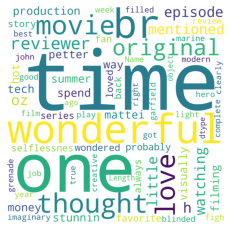

In [21]:
wc = WordCloud(width = 1000, height = 1000, background_color= 'white')
wc = wc.generate(str(corpus))
fig = plt.figure(num=1)
plt.axis('off')
plt.imshow(wc, cmap=None)
plt.show()

### Splitting the data

In [23]:
X = df['review']
y = df['sentiment']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [25]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((40000,), (10000,), (40000,), (10000,))

** Now the data has been split into training and testing set
* **Training** set contains 80% of the data
* **Test** set contains 20% of the data

**Pipelines is list of tuples where we can pass parameter and finally encapsulate into object 'text_clf'**
**Now I'm using Pipeline to encapsulate the TD-IDF and Classifier to train the classifier**
* TD-IDF transforms the words into a usable vector

In [27]:
text_clf = Pipeline([('tfidf', TfidfVectorizer()) , ('clf' , LinearSVC())])

In [28]:
text_clf.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [29]:
predictions = text_clf.predict(X_test)

In [30]:
print('Classification Report:', '\n',classification_report(y_test, predictions))
print('Confusion Matrix:', '\n', confusion_matrix(y_test, predictions))

Classification Report: 
               precision    recall  f1-score   support

    negative       0.90      0.88      0.89      4961
    positive       0.89      0.91      0.90      5039

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

Confusion Matrix: 
 [[4386  575]
 [ 471 4568]]


In [31]:
print('Accuracy:',accuracy_score(y_test, predictions))

Accuracy: 0.8954


In [32]:
test_res = pd.DataFrame( {"Actual" : y_test, "Predicted" : predictions})
test_res.sample(10)

,Actual,Predicted
4241,positive,negative
17407,negative,negative
47248,negative,negative
14013,positive,positive
38929,negative,negative
9008,positive,positive
36044,positive,positive
30696,negative,negative
42424,negative,positive
26185,negative,negative


In [33]:
con_mat = confusion_matrix(y_test, predictions)

<AxesSubplot:>

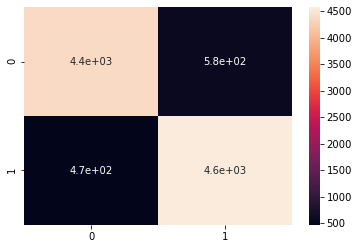

In [34]:
sns.heatmap(con_mat, annot = True,cbar =True)

***References:***https://developpaper.com/text-analysis-and-feature-engineering-of-nlp

**Machine Leanrning - *TOM MITCHELL* ch: Support Vector Machines**

### CLASSIFICATION REPORT
* Here we can observe how well, classifier has assigned each review to the set of pre-defined categories. To sum up, IMDB Dataset has 50,000 reviews, among which training data (40,000) and testing data (40,000) after train test split on 80-20 ratio.
* 4386 reviews were correctly classified as positive
* 4568 reviews were also correctly classified as negative
* 1046 reviews were misclassified.
* Overall, the text classification is good with 89.54 % accuracy and I feel that this accuracy can further be increased compared to the manually labelled reviews. by identifying the best hyper parameters through tuning (GridSearch CV) as to what constitutes relevant classification (positive or negative).